# 🎬 MovieLens Data Analysis

This notebook presents data analysis and visualizations based on the MovieLens dataset loaded into PostgreSQL.  
The goal is to gain insights from the data using SQL queries and explore the results using Python visualization tools.

---


In [184]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline


## 📁 Load Exported CSV Data

These CSV files were generated from SQL queries in the project.


In [185]:
# Define paths
output_path = '../output/'
df_avg_rating_per_movie = pd.read_csv(output_path + '1_avg_rating_per_movie.csv')
df_top10_most_rated = pd.read_csv(output_path + '2_top10_most_rated_movies.csv')
df_avg_rating_per_genre = pd.read_csv(output_path + '3_avg_rating_per_genre.csv')
df_top10_users = pd.read_csv(output_path + '4_top10_active_users.csv')
df_gender_gap = pd.read_csv(output_path + '5_gender_rating_gap.csv')
df_stddev_movies = pd.read_csv(output_path + '6_highest_stddev_movies.csv')
df_top10_highest_rated = pd.read_csv(output_path + '7_top10_highest_rated_movies.csv')



## ⭐ Top 10 Most Rated Movies

📌 *Based on SQL query #2 in `sql/analysis_queries.sql`*


C:\Users\Rotem\AppData\Local\Temp\ipykernel_15316\1936230134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


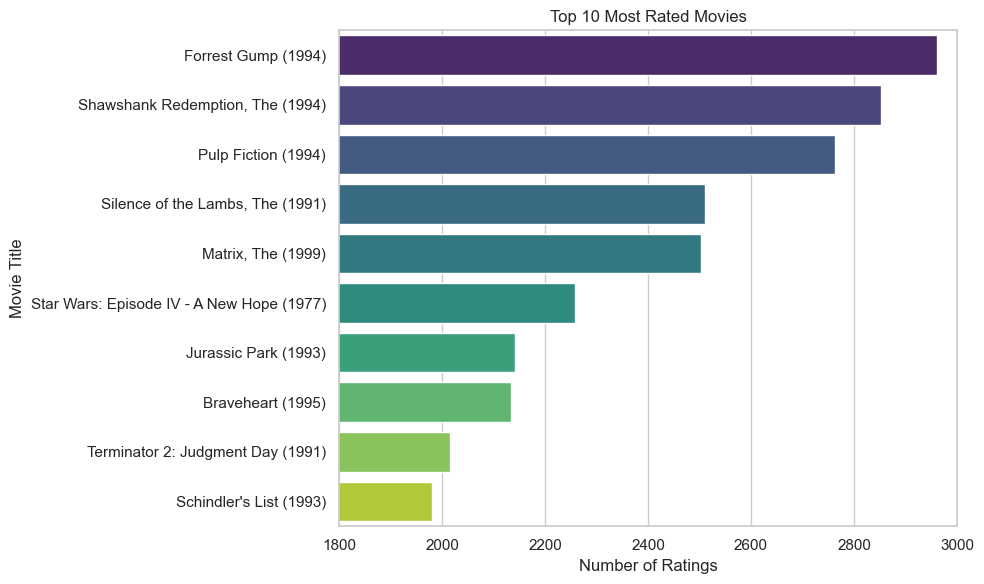

In [186]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.barplot(
    data=df_top10_most_rated.sort_values(by='num_ratings', ascending=False),
    y='title', x='num_ratings', palette='viridis')  # Create horizontal barplot for most rated movies

plt.title('Top 10 Most Rated Movies')  # Set chart title
plt.xlabel('Number of Ratings')  # Set x-axis label
plt.ylabel('Movie Title')  # Set y-axis label

plt.xlim(1800, 3000)  # Set x-axis range from 1800 to 3000
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()  # Display the plot


## 📊 Average Rating by Genre

📌 *Based on SQL query #3 in `sql/analysis_queries.sql`*


C:\Users\Rotem\AppData\Local\Temp\ipykernel_15316\2142371867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


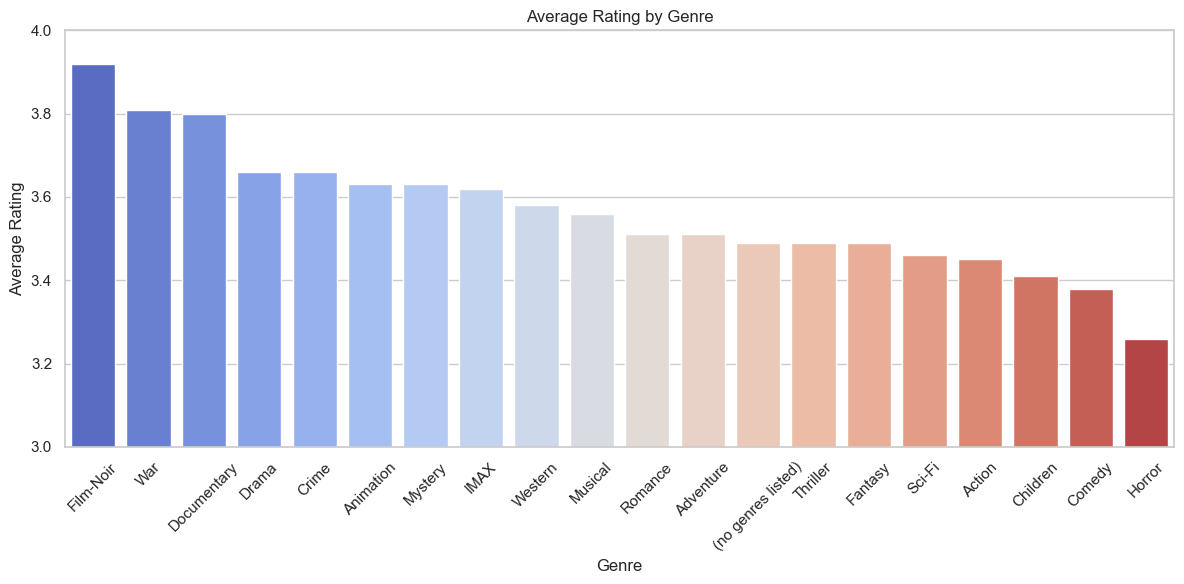

In [187]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.barplot(
    data=df_avg_rating_per_genre.sort_values(by='avg_rating', ascending=False),
    x='genre', y='avg_rating', palette='coolwarm')  # Create vertical barplot for average ratings by genre

plt.title('Average Rating by Genre')  # Set chart title
plt.xlabel('Genre')  # Set x-axis label
plt.ylabel('Average Rating')  # Set y-axis label

plt.ylim(3, 4)  # Set y-axis range between 3 and 4
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid label clipping
plt.show()  # Display the plot


## 👥 Gender-Based Rating Differences

📌 *Based on SQL query #5 in `sql/analysis_queries.sql`*


C:\Users\Rotem\AppData\Local\Temp\ipykernel_15316\3381922943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


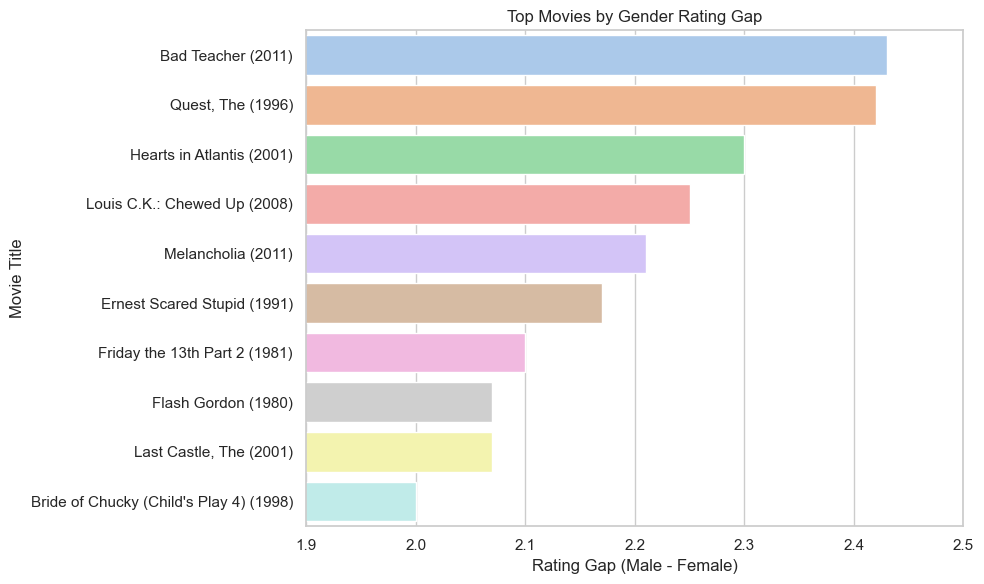

In [188]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.barplot(
    data=df_gender_gap.sort_values(by='gender_gap', ascending=False).head(10),
    y='title', x='gender_gap', palette='pastel')  # Create horizontal barplot for gender gap

plt.title('Top Movies by Gender Rating Gap')  # Set chart title
plt.xlabel('Rating Gap (Male - Female)')  # Set x-axis label
plt.ylabel('Movie Title')  # Set y-axis label

plt.xlim(1.9, 2.5)  # Set x-axis range to focus between 1.5 and 2.5
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()  # Display the plot


## 📈 Highest Rating Variance (Standard Deviation)

📌 *Based on SQL query #6 in `sql/analysis_queries.sql`*


C:\Users\Rotem\AppData\Local\Temp\ipykernel_15316\1425913442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


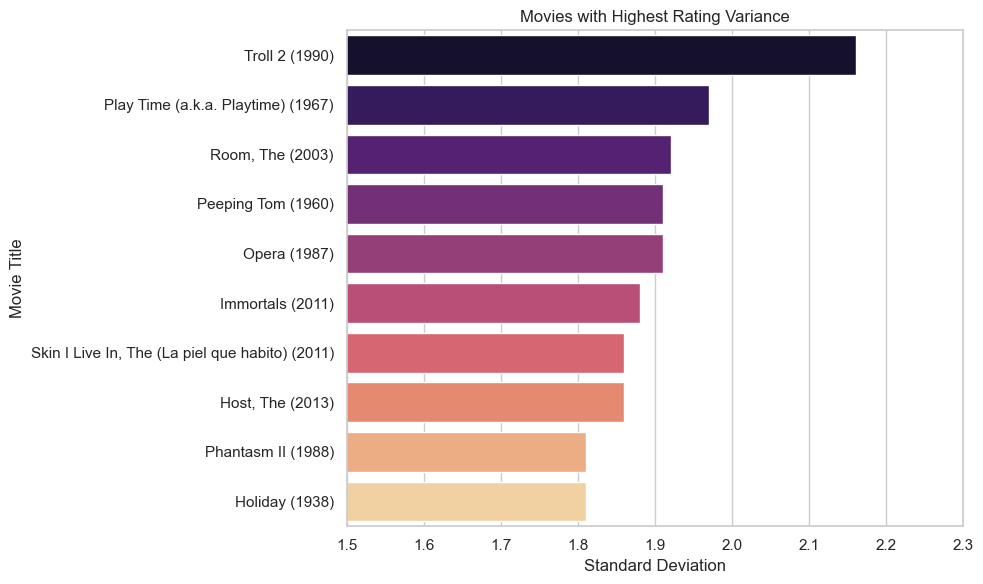

In [189]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(
    data=df_stddev_movies.sort_values(by='std_dev', ascending=False).head(10),
    y='title', x='std_dev', palette='magma')  # Create horizontal barplot

plt.title('Movies with Highest Rating Variance')  # Set chart title
plt.xlabel('Standard Deviation')  # Set x-axis label
plt.ylabel('Movie Title')  # Set y-axis label

plt.xlim(1.5, 2.3)  # Manually adjust the x-axis range for better alignment
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()  # Display the plot


## 🎬 Top 10 Highest Rated Movies (Min. 100 Ratings)

📌 *Based on SQL query #7 in `sql/analysis_queries.sql`*


C:\Users\Rotem\AppData\Local\Temp\ipykernel_15316\1709716029.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


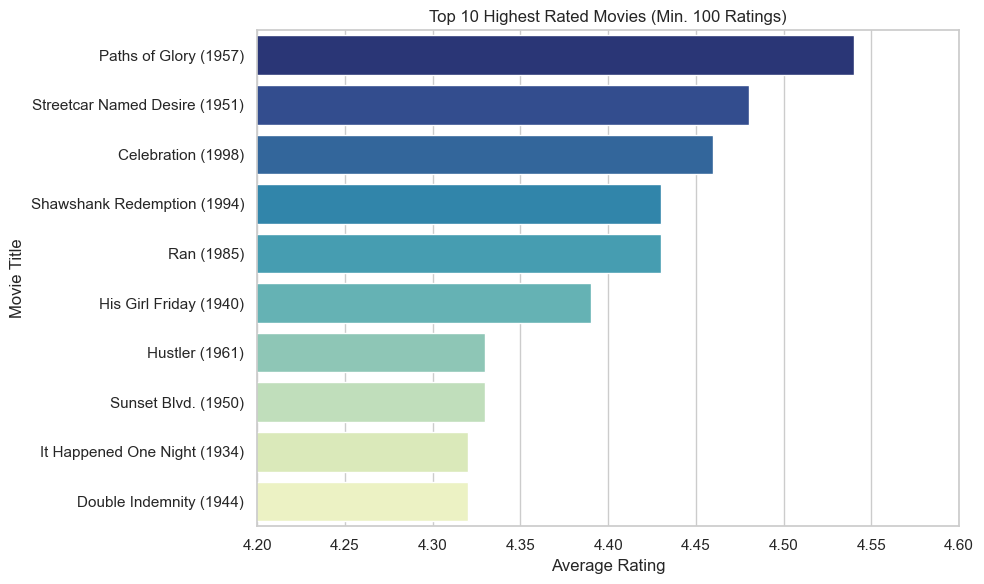

In [190]:
plt.figure(figsize=(10, 6))

# Sort data by average rating (highest first)
sorted_df = df_top10_highest_rated.sort_values(by='avg_rating', ascending=False).copy()

# Clean movie titles: remove suffixes like ", The", ", A", ", An"
sorted_df['title'] = sorted_df['title'].str.replace(', The', '', regex=False)
sorted_df['title'] = sorted_df['title'].str.replace(', A', '', regex=False)
sorted_df['title'] = sorted_df['title'].str.replace(', An', '', regex=False)

# Remove parentheses only if they DO NOT contain 4-digit years
sorted_df['title'] = sorted_df['title'].str.replace(r'\s*\((?!\d{4})[^)]*\)', '', regex=True)

# Create horizontal barplot with better color palette for white background
sns.barplot(
    data=sorted_df,
    y='title',
    x='avg_rating',
    palette='YlGnBu_r'  # Professional gradient: light = low, dark = high
)

# Add clean and informative labels
plt.title('Top 10 Highest Rated Movies (Min. 100 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(4.2, 4.6)  # Focused range for clarity

plt.tight_layout()
plt.show()


---
📌 This notebook showcases core insights from the MovieLens dataset.

For full SQL query logic and more exploratory directions, see:
`sql/analysis_queries.sql`

🎯 Focused visualizations ensure clarity while demonstrating real SQL-to-insight workflow.
